## Assignment: Web Scraping, SQL Insights, and Data Visualization

### Part 1: Web Scraping (Using Python)

#### Importing necessary libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [2]:
data = []
RATING_MAP = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}
text = requests.get('http://books.toscrape.com/')
soup = BeautifulSoup(text.text,'html.parser')
print("page-1.html scraping done")
def func1(soup):
    des = "http://books.toscrape.com/catalogue/category/books_1/"
    pattern = r'([a-zA-Z0-9-]+\.html)$'
    next = soup.find('a',string = 'next')
    if next:
        match = re.search(pattern, next.get('href'))
        if match:
            extracted_part = match.group(1)
            print(extracted_part+" scraping done")
            dd = soup.find('ol',class_ = 'row')
            book_list = dd.find_all('li')
            for lis in book_list:
                title = lis.find('h3').find('a').get('title').strip()
                rating_s = lis.find('p').get('class')[1].strip()
                rating = RATING_MAP.get(rating_s, 0)
                price = lis.find('p',class_ = 'price_color').text[2:].strip()
                availability = lis.find('p',class_ = 'instock availability').text.strip()
                data.append({
                    'title' : title,
                    'rating' : rating,
                    'price' : float(price),
                    'availability' : availability
                })
            text = requests.get(des + extracted_part)
            soup = BeautifulSoup(text.text,'html.parser')
            func1(soup)
        else:
            print("No matching pattern found.")
    else:
        dd = soup.find('ol',class_ = 'row')
        book_list = dd.find_all('li')
        for lis in book_list:
            title = lis.find('h3').find('a').get('title').strip()
            rating_s = lis.find('p').get('class')[1].strip()
            rating = RATING_MAP.get(rating_s, 0)
            price = lis.find('p',class_ = 'price_color').text[2:].strip()
            availability = lis.find('p',class_ = 'instock availability').text.strip()
            data.append({
                'title' : title,
                'rating' : rating,
                'price' : float(price),
                'availability' : availability
            })
        
func1(soup)
df = pd.DataFrame(data)
df.to_csv("books_scraping_data.csv",index=False)
print("Data scraping complete. Data saved to 'books_scraping_data.csv'.")      

page-1.html scraping done
page-2.html scraping done
page-3.html scraping done
page-4.html scraping done
page-5.html scraping done
page-6.html scraping done
page-7.html scraping done
page-8.html scraping done
page-9.html scraping done
page-10.html scraping done
page-11.html scraping done
page-12.html scraping done
page-13.html scraping done
page-14.html scraping done
page-15.html scraping done
page-16.html scraping done
page-17.html scraping done
page-18.html scraping done
page-19.html scraping done
page-20.html scraping done
page-21.html scraping done
page-22.html scraping done
page-23.html scraping done
page-24.html scraping done
page-25.html scraping done
page-26.html scraping done
page-27.html scraping done
page-28.html scraping done
page-29.html scraping done
page-30.html scraping done
page-31.html scraping done
page-32.html scraping done
page-33.html scraping done
page-34.html scraping done
page-35.html scraping done
page-36.html scraping done
page-37.html scraping done
page-38.ht

### Part 2: SQL Insights

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import urllib.parse

In [4]:
# Encode password for URL if it contains special characters like '@'
password = urllib.parse.quote_plus('Root@T1344')  # Make sure this matches your real password

# MySQL connection details
db_user = 'root'
db_host = 'localhost'
db_port = 3306
db_name = 'bookstore'

# Read CSV
df = pd.read_csv('books_scraping_data.csv')

# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_user}:{password}@{db_host}:{db_port}/{db_name}")

# Push DataFrame to MySQL
df.to_sql(name='books', con=engine, if_exists='replace', index=False)

print("Data successfully loaded into MySQL table 'books'")


Data successfully loaded into MySQL table 'books'


### Part 3: Exploratory Data Analysis (EDA) and Data Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df =  pd.read_csv('books_scraping_data.csv') #Loading data into csv
df.head()

,title,rating,price,availability
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [7]:
print('Misiing Values in each Column')
print(df.isnull().sum()) # Finding Missing Values
# Details of Books
nbooks = len(df)
avgp = sum(df['price'])/nbooks
print(f'Number of Books : {nbooks}') # Printing Number of Books
print(f'Average price of Books : {avgp:.2f}\n') # Printing Average Price

Misiing Values in each Column
title           0
rating          0
price           0
availability    0
dtype: int64
Number of Books : 1000
Average price of Books : 35.07



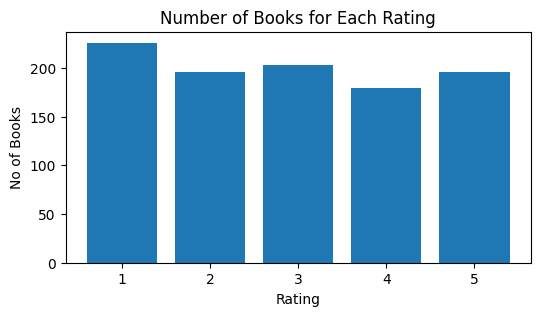

In [8]:
# Bar chart of the number of books for each rating (1 to 5 stars).
rating = df['rating'].value_counts().sort_index()
plt.figure(figsize=(6,3))
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('No of Books')
plt.title('Number of Books for Each Rating')
plt.show()

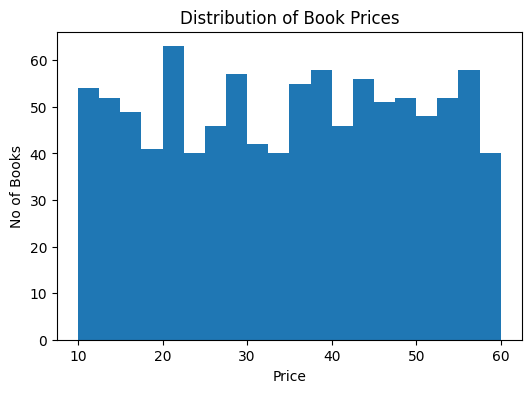

In [9]:
# Histogram showing the distribution of book prices.
plt.figure(figsize=(6,4))
plt.hist(df['price'],bins=20)
plt.xlabel('Price')
plt.ylabel('No of Books')
plt.title('Distribution of Book Prices')
plt.show()

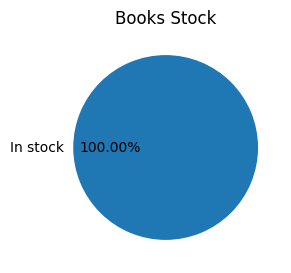

In [10]:
# Pie chart representing the proportion of books in stock vs. out of stock.
plt.figure(figsize=(3,3))
stocks = df['availability'].value_counts()
plt.pie(stocks, labels = stocks.index, autopct= '%1.2f%%')
plt.title('Books Stock')
plt.show()

Text(0, 0.5, 'Average Price')

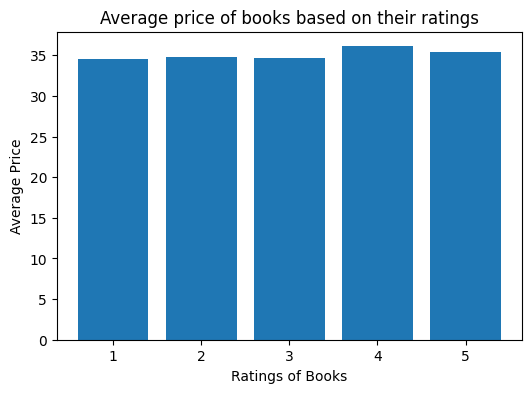

In [13]:
# Any other creative visualization that helps understand the dataset.
plt.figure(figsize=(6,4))
avgratingprice = df.groupby('rating')['price'].mean()
plt.bar(avgratingprice.index, avgratingprice.values)
plt.title("Average price of books based on their ratings")
plt.xlabel('Ratings of Books')
plt.ylabel('Average Price')